In [1]:
from parcels import FieldSet, ParticleSet, JITParticle, ErrorCode, ParticleFile, Variable, Field, ParcelsRandom
from parcels.application_kernels.TEOSseawaterdensity import PolyTEOS10_bsq
from datetime import timedelta as delta
import numpy as np
from glob import glob
import xarray as xr
import math

seed = 123
ParcelsRandom.seed(seed)

#------ Choose ------:
simdays = 20
secsdt = 60 #30
hrsoutdt = 6

INFO: Compiled ParcelsRandom ==> /tmp/parcels-265811/libparcels_random_bd107d18-f233-4672-8783-116e0e28f895.so


In [2]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

## Climatology

In [3]:
import matplotlib.pyplot as plt
import cmocean
from copy import copy
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

In [4]:
# dirread = '/data/oceanparcels/input_data/NASA_GISS/modelE/'

# yr = '2004'
# ufiles = sorted(glob(dirread+yr+'*_oijlh*.nc'))
# bgcfiles = sorted(glob(dirread+yr+'*_obijlh*.nc'))
# surffiles = sorted(glob(dirread+yr+'*_oijh*.nc'))

In [5]:
# ds = xr.open_dataset(ufiles[0])

In [6]:
# for i, filename in enumerate(ufiles[1:]):
#     print(i)
#     ds_0 = xr.open_dataset(filename)
#     ds = xr.concat([ds,ds_0], 'time')

In [7]:
balance_cmap = copy(plt.get_cmap('cmo.balance'))
balance_cmap.set_bad('dimgray')

thermal_cmap = copy(plt.get_cmap('cmo.thermal'))
thermal_cmap.set_bad('silver')

salt_cmap = copy(plt.get_cmap('cmo.haline'))
salt_cmap.set_bad('silver')

oxy_cmap = copy(plt.get_cmap('cmo.deep_r'))
oxy_cmap.set_bad('silver')

algae_cmap = copy(plt.get_cmap('cmo.algae'))
algae_cmap.set_bad('dimgray')

In [8]:
# fig=plt.figure(figsize=(15,12))
# fig.suptitle('2004 mean surface W [m/s]', fontsize=24)
# (ds['w']*-1).mean('time').isel(zoc=0).plot(cmap=balance_cmap,norm=mcolors.SymLogNorm(linthresh=1e-7,vmin=-1e-5,vmax=1e-5))# vmax=1)#, vmin=1e-5, vmax=1e-5)vmin=-1e-5,vmax=1e-5)

In [9]:
yr = '2004'
dirread_NEMO = '/data/oceanparcels/input_data/NEMO-MEDUSA/ORCA0083-N006/means/'
dirread_bgc_NEMO = '/data/oceanparcels/input_data/NEMO-MEDUSA_BGC/ORCA0083-N006/means/'
dirread_mesh = '/data/oceanparcels/input_data/NEMO-MEDUSA/ORCA0083-N006/domain/'

ufiles_NEMO = sorted(glob(dirread_NEMO+'ORCA0083-N06_'+yr+'*d05U.nc'))
vfiles_NEMO = sorted(glob(dirread_NEMO+'ORCA0083-N06_'+yr+'*d05V.nc'))
wfiles_NEMO = sorted(glob(dirread_NEMO+'ORCA0083-N06_'+yr+'*d05W.nc'))
pfiles_NEMO = sorted(glob(dirread_bgc_NEMO+'ORCA0083-N06_'+yr+'*d05P.nc'))
ppfiles_NEMO = sorted(glob(dirread_bgc_NEMO+'ORCA0083-N06_'+yr+'*d05D.nc'))
tsfiles_NEMO = sorted(glob(dirread_NEMO+'ORCA0083-N06_'+yr+'*d05T.nc'))
mesh_mask_NEMO = dirread_mesh+'coordinates.nc'

In [10]:
ds_pp_NEMO = xr.open_dataset(ppfiles_NEMO[0])
ds_p_NEMO = xr.open_dataset(pfiles_NEMO[0])
ds_ts_NEMO = xr.open_dataset(tsfiles_NEMO[0])

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ZMI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

In [11]:
mesh_mask = xr.open_dataset(mesh_mask_NEMO, decode_times=False)

In [12]:
def getclosest_ij(lats,lons,latpt,lonpt):
    """Function to find the index of the closest point to a certain lon/lat value."""
    dist_sq = (lats-latpt)**2 + (lons-lonpt)**2                 # find squared distance of every point on grid
    minindex_flattened = dist_sq.argmin()                       # 1D index of minimum dist_sq element
    return np.unravel_index(minindex_flattened, lats.shape)     # Get 2D index for latvals and lonvals arrays from 1D index

In [13]:
n_res = 3
lat_release_NPSG = np.tile(np.linspace(28,36,n_res),[n_res,1])
# lat_release_NPSG = np.tile(np.linspace(22,32,n_res),[n_res,1])
lon_release_NPSG = np.tile(np.linspace(-143,-135,n_res),[n_res,1])
# lon_release_NPSG = np.tile(np.linspace(-143,-134,n_res),[n_res,1])
lons_NPSG, lats_NPSG = np.meshgrid(lon_release_NPSG, lat_release_NPSG)

lat_release_EqPac = np.tile(np.linspace(-4,4,n_res),[n_res,1])
# lat_release_EqPac = np.tile(np.linspace(-4.5,4.5,n_res),[n_res,1])
lon_release_EqPac = np.tile(np.linspace(-148,-140,n_res),[n_res,1])
# lon_release_EqPac = np.tile(np.linspace(-148,-139,n_res),[n_res,1])
lons_EqPac, lats_EqPac = np.meshgrid(lon_release_EqPac, lat_release_EqPac)

lat_release_SO  = np.tile(np.linspace(-65,-55,n_res),[n_res,1])
# lat_release_SO  = np.tile(np.linspace(-62,-53,n_res),[n_res,1])
lon_release_SO = np.tile(np.linspace(-10,0,n_res),[n_res,1])
# lon_release_SO = np.tile(np.linspace(-115,-106,n_res),[n_res,1])
lons_SO, lats_SO = np.meshgrid(lon_release_SO, lat_release_SO)

In [57]:
region = 'SO'
iy_min, ix_min = getclosest_ij(mesh_mask['nav_lat'], mesh_mask['nav_lon'], lat_release_SO[0,0], lon_release_SO[0,0])
iy_max, ix_max = getclosest_ij(mesh_mask['nav_lat'], mesh_mask['nav_lon'], lat_release_SO[0,-1], lon_release_SO[0,-1])

In [58]:
D_SO = ds_p_NEMO['PHD'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
PP_SO = ds_pp_NEMO['TPP3'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
T_SO = ds_ts_NEMO['potemp'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
SAL_SO = ds_ts_NEMO['salin'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
TAU_SO = ds_ts_NEMO['taum'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
MLD_SO = ds_ts_NEMO['mldr10_1'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
W10_SO = ds_ts_NEMO['sowindsp'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))

In [59]:
for i, filename in enumerate(ppfiles_NEMO[1:]):
    ds_0 = xr.open_dataset(filename)
    PP_0 = ds_0['TPP3'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
    print(i)
    PP_SO = xr.concat([PP_SO,PP_0], 'time_counter')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

1


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

2


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

3


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

4


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

5


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

6


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

7


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

8


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

9


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

10


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

11


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

12


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

13


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

14


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'SDC_1000' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTC' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTALK' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTO2' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parce

15


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'TALK' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'KW660' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ATM_PP0' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'O2FLUX' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

16


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

17


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'N_CONS' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'C_PROD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'C_CONS' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'O2_PROD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcel

18


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'IBEN_FE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'IBEN_C' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'IBEN_SI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'IBEN_CA' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parc

19


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RGS1000F' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'REMINN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'REMINSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'REMINFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_par

20


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

21


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'OBEN_C' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'OBEN_SI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'OBEN_CA' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'BEN_N' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcel

22


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

23


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

24


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ATM_PP0' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'O2FLUX' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'O2SAT' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CAL_CCD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcel

25


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

26


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

27


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

28


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

29


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RGS_200F' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RGS_500F' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RGS1000F' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'REMINN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_p

30


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

31


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

32


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

33


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'SEAFLRFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'SEAFLRC' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'SEAFLRCA' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'MED_QSR' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_p

34


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

35


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

36


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

37


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

38


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RGS_100F' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RGS_200F' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RGS_500F' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RGS1000F' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3

39


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

40


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

41


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ARG_CCD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'SFR_OCAL' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'SFR_OARG' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'N_PROD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_pa

42


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'BEN_C' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'BEN_SI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'BEN_CA' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RUNOFF' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/

43


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

44


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

45


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

46


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

47


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

48


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

49


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

50


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

51


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

52


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

53


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

54


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

55


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

56


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INT_PN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INT_PD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ML_PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ML_PRD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels

57


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

58


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

59


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTC' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTALK' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTO2' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'LYSO_CA' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcel

60


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

61


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

62


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

63


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

64


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

65


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

66


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

67


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

68


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'BEN_C' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'BEN_SI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'BEN_CA' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'RUNOFF' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/

69


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

70


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTSI' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'INVTFE' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PRN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib

71


In [60]:
for i, filename in enumerate(pfiles_NEMO[1:]):
    ds_0 = xr.open_dataset(filename)
    D_0 = ds_0['PHD'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
    print(i)
    D_SO = xr.concat([D_SO,D_0], 'time_counter')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

1


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

2


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

3


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

4


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

5


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

6


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

7


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

8


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

9


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

10


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

11


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

12


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

13


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

14


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

15


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

16


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

17


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

18


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

19


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

20


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

21


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

22


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

23


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

24


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

25


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

26


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

27


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

28


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

29


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

30


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

31


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

32


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

33


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

34


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

35


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

36


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

37


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

38


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

39


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

40


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

41


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

42


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

43


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

44


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

45


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

46


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

47


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

48


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

49


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

50


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

51


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

52


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

53


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

54


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

55


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

56


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

57


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

58


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

59


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

60


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

61


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

62


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

63


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

64


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

65


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

66


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

67


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

68


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

69


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

70


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'CHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHN' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'PHD' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3

71


In [61]:
PP_profile = PP_SO.mean('time_counter').mean('y').mean('x')
PP_profile = np.nan_to_num(PP_profile)

In [62]:
D_profile = D_SO.mean('time_counter').mean('y').mean('x')
D_profile = np.nan_to_num(D_profile)

Text(0.5, 0, 'Diatom concentration [mmol N m-3]')

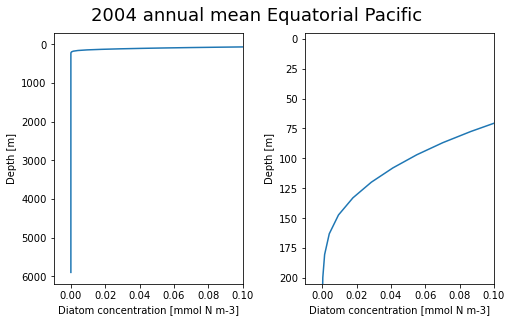

In [40]:
fig = plt.figure(figsize=(7,4), constrained_layout=True)
fig.suptitle('2004 annual mean '+regions[region], fontsize=18, y=1.08)

gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.plot(D_profile,ds_p_NEMO['deptht'])
ax0.invert_yaxis()
ax0.set_xlim(-0.01,0.1)

ax0.set_ylabel('Depth [m]')
ax0.set_xlabel('Diatom concentration [mmol N m-3]')

ax1.plot(D_profile,ds_p_NEMO['deptht'])
ax1.set_ylim(205,-5)
ax1.set_xlim(-0.01,0.1)

ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Diatom concentration [mmol N m-3]')

Text(0.5, 0, 'Primary productivity [mmol N m-3 d-1]')

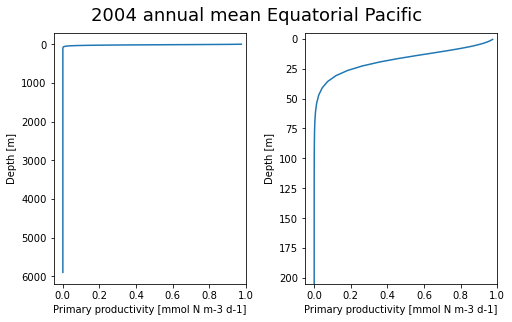

In [41]:
fig = plt.figure(figsize=(7,4), constrained_layout=True)
fig.suptitle('2004 annual mean '+regions[region], fontsize=18, y=1.08)

gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.plot(PP_profile, ds_pp_NEMO['deptht'])
ax0.invert_yaxis()
ax0.set_xlim(-0.05,1)

ax0.set_ylabel('Depth [m]')
ax0.set_xlabel('Primary productivity [mmol N m-3 d-1]')

ax1.plot(PP_profile,ds_pp_NEMO['deptht'])
ax1.set_ylim(205,-5)
ax1.set_xlim(-0.05,1)

ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Primary productivity [mmol N m-3 d-1]')

In [116]:
lons = D_EqPac['nav_lon']
lats = D_EqPac['nav_lat']

In [117]:
fixed_lons = lons.copy()
for i, start in enumerate(np.argmax(np.abs(np.diff(lons)) > 180, axis=1)):
    fixed_lons[i, start+1:] += 360

In [119]:
time_mean_D = D_EqPac.mean(('time_counter','deptht'))

In [78]:
# time_mean_MLD = MLD_NPSG.mean('time_counter')

In [79]:
# time_mean_tau = tau_NPSG.mean('time_counter')

In [80]:
# time_mean_PP = PP_NPSG.mean('time_counter')

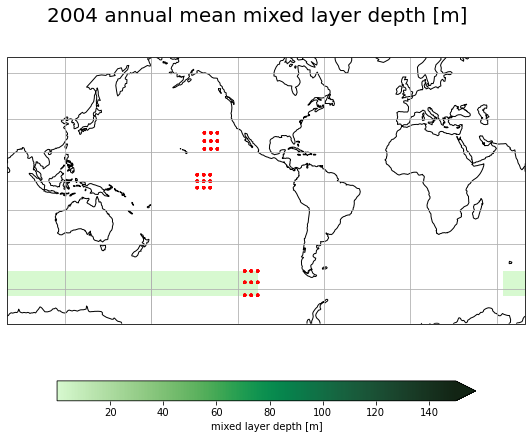

In [81]:
fig = plt.figure(figsize=(10,7))
fig.suptitle('2004 annual mean mixed layer depth [m]', fontsize=20)

ax = plt.axes(projection=ccrs.Mercator(central_longitude=-100, min_latitude=-70.0, max_latitude=65.0))
ax.set_global()

sc_NPSG = plt.scatter(lons_NPSG, lats_NPSG, color='red', s=5, transform=ccrs.PlateCarree(), zorder=1)
sc_NPSG.set_facecolor("none")

sc_EqPac = plt.scatter(lons_EqPac, lats_EqPac, color='red', s=5, transform=ccrs.PlateCarree(), zorder=1)
sc_EqPac.set_facecolor("none")

sc_SO = plt.scatter(lons_SO, lats_SO, color='red', s=5, transform=ccrs.PlateCarree(), zorder=1)
sc_SO.set_facecolor("none")

mesh = ax.pcolormesh(fixed_lons, lats, time_mean_D, cmap='cmo.algae',
                     transform=ccrs.PlateCarree(), zorder=0, vmax=150) #, norm=mcolors.LogNorm(vmin=1e-3, vmax=1))

plt.colorbar(mesh, orientation='horizontal', shrink=0.75, label='mixed layer depth [m]', extend='max')

ax.gridlines()
ax.coastlines()

plt.show()

In [63]:
for i, filename in enumerate(tsfiles_NEMO[1:]):
    ds_0 = xr.open_dataset(filename)
    MLD_0 = ds_0['mldr10_1'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
    print(i)
    MLD_SO = xr.concat([MLD_SO,MLD_0], 'time_counter')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

1


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

2


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

3


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

4


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

5


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

6


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

7


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

8


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

9


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

10


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

11


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

12


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

13


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

14


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

15


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

16


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

17


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

18


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

19


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

20


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

21


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

22


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

23


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

24


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

25


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

26


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

27


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

28


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

29


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

30


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

31


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

32


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

33


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

34


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

35


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

36


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

37


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

38


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

39


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

40


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

41


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

42


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

43


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

44


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

45


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

46


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

47


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

48


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

49


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

50


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

51


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

52


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

53


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

54


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

55


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

56


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

57


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

58


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

59


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

60


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

61


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

62


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

63


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

64


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

65


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

66


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

67


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

68


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

69


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

70
71


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

In [64]:
for i, filename in enumerate(tsfiles_NEMO[1:]):
    ds_0 = xr.open_dataset(filename)
    TAU_0 = ds_0['taum'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
    print(i)
    TAU_SO = xr.concat([TAU_SO,TAU_0], 'time_counter')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

1


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

2


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

3


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

4
5


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

6
7


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

8
9


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

10


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

11
12


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

13
14


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

15


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

16


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

17


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

18


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

19


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

20


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

21


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

22
23


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

24
25


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

26


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

27


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

28
29


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

30
31


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

32
33


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

34
35


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

36
37


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

38
39


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

40
41


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

42
43


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

44
45


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

46
47


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

48


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

49
50


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

51
52


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

53
54


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

55
56


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

57
58


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

59
60


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

61
62


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

63
64


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

65
66


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

67
68


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

69
70
71


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

In [65]:
for i, filename in enumerate(tsfiles_NEMO[1:]):
    ds_0 = xr.open_dataset(filename)
    W10_0 = ds_0['sowindsp'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
    print(i)
    W10_SO = xr.concat([W10_SO,W10_0], 'time_counter')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

1
2


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

3
4


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

5


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

6
7


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

8


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

9
10


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

11
12


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

13
14


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

15
16


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

17


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

18
19


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

20
21


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

22
23


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

24
25


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

26
27


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

28
29


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

30
31


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

32
33


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

34
35


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

36
37


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

38


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

39
40


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

41
42


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

43
44


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

45
46


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

47


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

48
49


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

50
51


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

52
53


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

54
55


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

56
57


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

58
59


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

60
61


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

62


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

63


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

64
65


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/

66


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

67
68


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ssh' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'zossq' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldkz5' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'mldr10_1' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/l

69


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

70
71


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

In [66]:
for i, filename in enumerate(tsfiles_NEMO[1:]):
    ds_0 = xr.open_dataset(filename)
    T_0 = ds_0['potemp'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
    print(i)
    T_SO = xr.concat([T_SO,T_0], 'time_counter')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

1


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

2


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

3


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

4


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

5


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

6


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

7


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

8


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

9


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

10


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

11


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

12


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

13


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

14


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

15


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

16


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

17


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

18


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

19


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

20


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

21


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

22


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

23


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

24


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

25


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

26


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

27


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

28


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

29


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

30


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

31


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

32


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

33


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

34


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

35


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

36


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

37


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

38


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

39


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

40


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

41


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

42


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

43


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

44


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

45


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

46


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

47


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

48


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

49


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

50


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

51


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

52


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

53


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

54


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

55


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

56


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

57


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

58


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

59


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

60


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

61


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

62


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

63


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

64


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

65


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

66


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

67


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

68


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

69


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

70


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

71


In [67]:
for i, filename in enumerate(tsfiles_NEMO[1:]):
    ds_0 = xr.open_dataset(filename)
    SAL_0 = ds_0['salin'].isel(y=slice(iy_min,iy_max),x=slice(ix_min,ix_max))
    print(i)
    SAL_SO = xr.concat([SAL_SO,SAL_0], 'time_counter')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

1


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

2


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

3


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

4


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

5


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

6


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

7


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

8


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

9


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

10


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

11


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

12


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

13


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

14


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

15


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

16


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

17


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

18


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

19


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

20


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

21


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

22


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

23


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

24


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

25


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

26


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

27


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

28


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

29


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

30


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

31


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

32


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

33


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

34


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

35


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

36


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

37


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

38


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

39


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

40


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

41


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

42


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

43


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

44


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

45


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

46


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

47


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

48


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

49


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

50


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

51


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

52


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

53


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

54


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

55


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

56


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

57


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

58


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

59


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

60


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

61


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

62


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

63


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

64


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

65


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

66


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

67


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

68


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

69


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

70


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sst' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'sss' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'potemp' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'salin' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6492215/.conda/envs/py3_parcels/lib/py

71


### Calculate density

In [68]:
Z = - ds_ts_NEMO['deptht']
SA = SAL_SO
CT = T_SO

SAu = 40 * 35.16504 / 35
CTu = 40
Zu = 1e4
deltaS = 32
R000 = 8.0189615746e+02
R100 = 8.6672408165e+02
R200 = -1.7864682637e+03
R300 = 2.0375295546e+03
R400 = -1.2849161071e+03
R500 = 4.3227585684e+02
R600 = -6.0579916612e+01
R010 = 2.6010145068e+01
R110 = -6.5281885265e+01
R210 = 8.1770425108e+01
R310 = -5.6888046321e+01
R410 = 1.7681814114e+01
R510 = -1.9193502195e+00
R020 = -3.7074170417e+01
R120 = 6.1548258127e+01
R220 = -6.0362551501e+01
R320 = 2.9130021253e+01
R420 = -5.4723692739e+00
R030 = 2.1661789529e+01
R130 = -3.3449108469e+01
R230 = 1.9717078466e+01
R330 = -3.1742946532e+00
R040 = -8.3627885467e+00
R140 = 1.1311538584e+01
R240 = -5.3563304045e+00
R050 = 5.4048723791e-01
R150 = 4.8169980163e-01
R060 = -1.9083568888e-01
R001 = 1.9681925209e+01
R101 = -4.2549998214e+01
R201 = 5.0774768218e+01
R301 = -3.0938076334e+01
R401 = 6.6051753097e+00
R011 = -1.3336301113e+01
R111 = -4.4870114575e+00
R211 = 5.0042598061e+00
R311 = -6.5399043664e-01
R021 = 6.7080479603e+00
R121 = 3.5063081279e+00
R221 = -1.8795372996e+00
R031 = -2.4649669534e+00
R131 = -5.5077101279e-01
R041 = 5.5927935970e-01
R002 = 2.0660924175e+00
R102 = -4.9527603989e+00
R202 = 2.5019633244e+00
R012 = 2.0564311499e+00
R112 = -2.1311365518e-01
R022 = -1.2419983026e+00
R003 = -2.3342758797e-02
R103 = -1.8507636718e-02
R013 = 3.7969820455e-01
ss = np.sqrt((SA + deltaS) / SAu)
tt = CT / CTu
zz = -Z / Zu
rz3 = R013 * tt + R103 * ss + R003
rz2 = (R022 * tt + R112 * ss + R012) * tt + (R202 * ss + R102) * ss + R002
rz1 = (((R041 * tt + R131 * ss + R031) * tt + (R221 * ss + R121) * ss + R021) * tt + ((R311 * ss + R211) * ss + R111) * ss + R011) * tt + (((R401 * ss + R301) * ss + R201) * ss + R101) * ss + R001
rz0 = (((((R060 * tt + R150 * ss + R050) * tt + (R240 * ss + R140) * ss + R040) * tt + ((R330 * ss + R230) * ss + R130) * ss + R030) * tt + (((R420 * ss + R320) * ss + R220) * ss + R120) * ss + R020) * tt + ((((R510 * ss + R410) * ss + R310) * ss + R210) * ss + R110) * ss + R010) * tt + (((((R600 * ss + R500) * ss + R400) * ss + R300) * ss + R200) * ss + R100) * ss + R000
RHO_SO = ((rz3 * zz + rz2) * zz + rz1) * zz + rz0

### KPP

In [69]:
g = 7.32e10/(86400.**2.)
rho_a = 1.22
wave_age = 35
phi = 0.9
vk = 0.4

u_s_a =  np.sqrt(TAU_SO/rho_a)
u_s_w =  np.sqrt(np.divide(TAU_SO,RHO_SO.isel(deptht=0)))

alpha = (vk * u_s_w) / phi

beta = np.divide((wave_age * u_s_a), W10_SO)
z0 = 3.5153e-5 * np.power(beta, -0.42) * np.square(W10_SO) / g

KPP_SO = alpha * (ds_ts_NEMO['deptht'] + z0) * np.square(1-np.divide(ds_ts_NEMO['deptht'],MLD_SO))

In [70]:
Z_SO = np.tile(ds_ts_NEMO['deptht'],(KPP_SO.shape[2],1))
Z_SO = np.tile(Z_SO, (KPP_SO.shape[1],1,1))
Z_SO = np.tile(Z_SO, (KPP_SO.shape[0],1,1,1))

In [71]:
mld_SO = np.tile(np.expand_dims(MLD_SO,axis=3), (1,1,1,len(ds_ts_NEMO['deptht'])))

In [72]:
kpp_SO = KPP_SO.values
kpp_SO[Z_SO>mld_SO] = 0

In [73]:
RHO_profile = RHO_SO.mean('time_counter').mean('y').mean('x')
RHO_profile = np.nan_to_num(RHO_profile)

In [53]:
kpp_profile = np.mean(kpp_EqPac, axis=(0,1,2))

Text(0.5, 0, 'Vertical diffusivity [m2 s-1]')

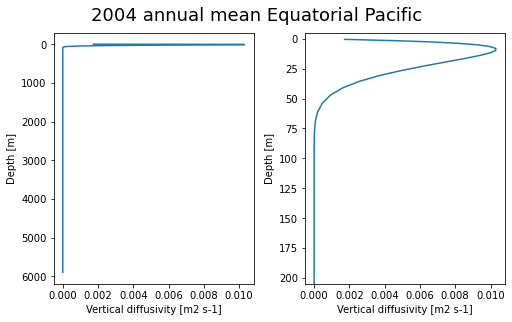

In [54]:
fig = plt.figure(figsize=(7,4), constrained_layout=True)
fig.suptitle('2004 annual mean '+regions[region], fontsize=18, y=1.08)

gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.plot(kpp_profile, ds_ts_NEMO['deptht'])
ax0.invert_yaxis()
# ax0.set_xlim(-0.05,1)
# ax0.set_xlim(1000,1100)

ax0.set_ylabel('Depth [m]')
ax0.set_xlabel('Vertical diffusivity [m2 s-1]')

ax1.plot(kpp_profile,ds_ts_NEMO['deptht'])
ax1.set_ylim(205,-5)
# ax1.set_xlim(-0.1,10)
# ax1.set_xscale('log')

ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Vertical diffusivity [m2 s-1]')

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  """


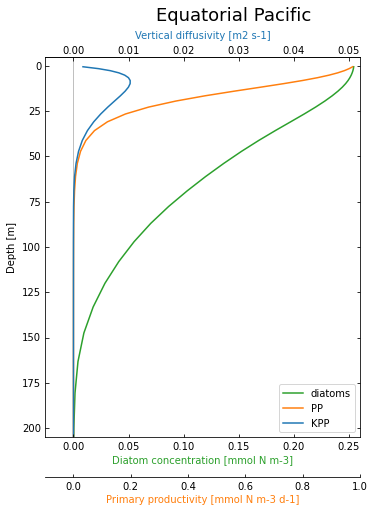

In [55]:
fig = plt.figure(figsize=(7,7), constrained_layout=True)
fig.suptitle(regions[region], fontsize=18)

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twiny()
par2 = host.twiny()

offset = 40
new_fixed_axis = par1.get_grid_helper().new_fixed_axis
par1.axis["bottom"] = new_fixed_axis(loc="bottom",
                                    axes=par1,
                                    offset=(0, -offset))

par1.axis["bottom"].toggle(all=True)
par1.axis["top"].toggle(all=False)
par2.axis["top"].toggle(all=True)

# host.set_ylim(505, -5)
host.set_ylim(205, -5)

host.set_xlabel("Diatom concentration [mmol N m-3]")
host.set_ylabel("Depth [m]")
par1.set_xlabel("Primary productivity [mmol N m-3 d-1]")
par2.set_xlabel("Vertical diffusivity [m2 s-1]")

p1, = host.plot(D_profile, ds_ts_NEMO['deptht'], c='tab:green', label='diatoms')
p2, = par1.plot(PP_profile, ds_ts_NEMO['deptht'], c='tab:orange', label='PP')
p3, = par2.plot(kpp_profile, ds_ts_NEMO['deptht'], c='tab:blue', label='KPP')

host.set_xlim(-0.026,0.26)
par1.set_xlim(-0.1,1)
# par2.set_xlim(-0.0115,0.115)
par2.set_xlim(-0.0052,0.052)

# host.grid(which='major',axis='x')
host.vlines(0,-10,210,color='silver',linewidth=1)
host.legend(loc = 'lower right')

host.axis["bottom"].label.set_color(p1.get_color())
par1.axis["bottom"].label.set_color(p2.get_color())
par2.axis["top"].label.set_color(p3.get_color())


In [74]:
kpp_profile0 = np.mean(kpp_EqPac, axis=(0,1,2))
kpp_profile1 = np.mean(kpp_NPSG, axis=(0,1,2))
kpp_profile2 = np.mean(kpp_SO, axis=(0,1,2))

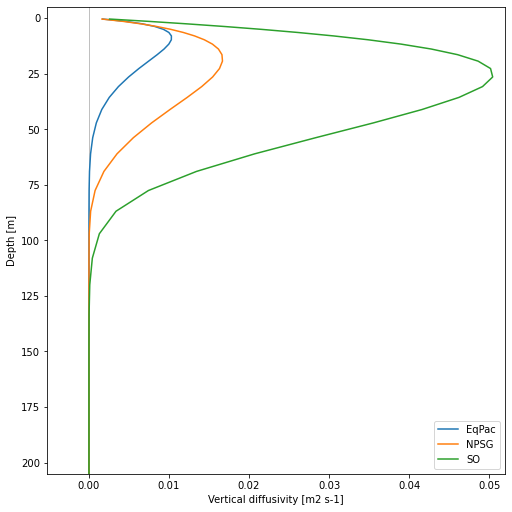

In [78]:
fig = plt.figure(figsize=(7,7), constrained_layout=True)
fig.suptitle('Annual mean Kz', fontsize=18)

ax=plt.axes()

ax.set_ylim(205, -5)

ax.set_xlabel("Vertical diffusivity [m2 s-1]")
ax.set_ylabel("Depth [m]")

ax.plot(kpp_profile0, ds_ts_NEMO['deptht'], label='EqPac')
ax.plot(kpp_profile1, ds_ts_NEMO['deptht'], label='NPSG')
ax.plot(kpp_profile2, ds_ts_NEMO['deptht'], label='SO')

ax.set_xlim(-0.0052,0.052)

# host.grid(which='major',axis='x')
ax.vlines(0,-10,210,color='silver',linewidth=1)
ax.legend(loc = 'lower right')

# host.axis["bottom"].label.set_color(p1.get_color())
# par1.axis["bottom"].label.set_color(p2.get_color())
# par2.axis["top"].label.set_color(p3.get_color())
